# Проект: вариант 3
Описание

Представьте, что вы работаете в крупном дейтинговом приложении.

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

Проверьте:

Был ли эксперимент успешен в целом.
*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.

# Данные

Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2). Для каждой из них:

users_*.csv – информация о пользователях:

uid – идентификатор пользователя
age – возраст
attraction_coeff – коэффициент привлекательности (от 0 до 1000,{лайки}/{просмотры}*1000)
coins – число монеток (внутренняя валюта)
country – страна  
visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
gender – пол
age_filter_start  – фильтр поиска, мин. значение 
age_filter_end  – фильтр поиска, макс. значение 
views_count – число полученных оценок 
was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)
is_premium –  является ли премиум
total_revenue – нормированная выручка 

transactions_*.csv – информация о платежах пользователей:

uid – идентификатор пользователя
country – страна
joined_at – дата и время регистрации
paid_at – дата и время покупки
revenue – нормированная выручка
payment_id – идентификатор платежа
from_page – откуда пользователь перешел на страницу оплаты
product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое)

# Файлы

users_test – информация о пользователях в тестовой группе. 
users_control_1 – информация о пользователях в первой контрольной группе. 
users_control_2 – информация о пользователях во второй контрольной группе . 
transactions_test – информация о платежах пользователей в тестовой группе. 
transactions_control_1 – информация о платежах пользователей в первой контрольной группе. 
transactions_control_2 – информация о платежах пользователей во второй контрольной группе 

# 1.Подключение библиотек, загрузка файлов и их преобразование

Для начала посмотрим на данные и проверим:
-есть ли пропущение значения в колонках, 
-пустые строки, 
-дубликаты в данных (несколько одинаковых строчек),
-один пользователь относится только к одной группе

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import scipy.stats as st
import numpy as np 

import warnings
warnings.simplefilter(action='ignore')

In [2]:
users_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kudina/final_project_my/project_3_users_test.csv', sep = ';')
users_control_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kudina/final_project_my/project_3_users_control_1.csv', sep = ';')
users_control_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kudina/final_project_my/project_3_users_control_2.csv', sep = ';')

transactions_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kudina/final_project_my/project_3_transactions_test.csv', sep = ';')
transactions_control_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kudina/final_project_my/project_3_transactions_control_1.csv', sep = ';')
transactions_control_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kudina/final_project_my/project_3_transactions_control_2.csv', sep = ';')

посмотрим как выглядят данные и их размер

In [3]:
users_test.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0


In [4]:
users_control_1.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0


In [5]:
users_control_2.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0


In [6]:
print('df size in test group:\n',
      users_test.shape,
      '\n\n df size in control1 group:\n',
      users_control_1.shape,
      '\n\n df size in control2 group:\n',
      users_control_2.shape)

df size in test group:
 (4308, 13) 

 df size in control1 group:
 (4340, 13) 

 df size in control2 group:
 (4264, 13)


In [7]:
#добавим колонки для обозначения группы пользователя и создадим один общий датафрейм 
#для более удобного анализирования
users_test['group']='test'
users_control_1['group']='control1'
users_control_2['group']='control2'

users_info_full_df = pd.concat([users_test, users_control_1,users_control_2], sort=False, axis=0)
users_info_full_df.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0,test
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0,test
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0,test


In [8]:
users_info_full_df.shape

(12912, 14)

In [9]:
#проверка данных на полноту
if users_test.shape[0]+users_control_1.shape[0]+users_control_2.shape[0]-users_info_full_df.shape[0] == 0:
    print('ВСЁ ОК')
else:
    print('каких-то строчек не хватает')

ВСЁ ОК


In [10]:
#по описанию таблиц с юзерами мы видим, что это должен быть dimension и строки должны быть уникальны
#поэтому посчитаем кол-во уникальных юзеров и таким образом убедимся, 
# что один пользователь входит только в одну группу 
if users_info_full_df.uid.nunique()-users_info_full_df.shape[0] == 0:
    print('все строки уникальны, дублирующихся нет')
else:
    print('обнаружены дубликаты строк')

все строки уникальны, дублирующихся нет


In [11]:
users_info_full_df.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
group                object
dtype: object

In [12]:
users_info_full_df.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,1.291200e+04,12912.000000,12912.000000,170.000000,12912.000000,12912.000000,12912.000000,12912.000000,1255.0,540.0,12912.000000
mean,8.917569e+08,32.010378,315.455545,688.958824,0.955158,26.815985,38.568463,46.641032,1.0,1.0,526.837283
std,1.610285e+06,10.224415,323.488766,7690.943033,0.206965,9.447197,15.511204,285.324194,0.0,0.0,5524.662716
min,8.910509e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913565e+08,25.000000,0.000000,6.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917255e+08,30.000000,250.000000,10.000000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920860e+08,38.000000,529.000000,28.000000,1.000000,32.000000,45.000000,21.000000,1.0,1.0,0.000000
max,1.053059e+09,99.000000,1000.000000,99958.000000,1.000000,96.000000,102.000000,16157.000000,1.0,1.0,486330.000000


In [13]:
#проверим датафрейм на пропущенные значения
users_info_full_df.isna().sum()

uid                     0
age                     0
attraction_coeff        0
coins               12742
country                 0
visit_days           4018
gender                  0
age_filter_start        0
age_filter_end          0
views_count             0
was_premium         11657
is_premium          12372
total_revenue           0
group                   0
dtype: int64

Мы видим, что у нас есть пропущенные значения в колонках coins, visit_days,was_premium,is_premium.
Это не будет считаться багом, т.к.:
монеток может не быть, 
пользователь может ни разу не зайти в приложение после регистрации (хотя кажется, что 31% пользователей без данных о посещениях приложения- это довольно много, возможно всё же какие-то данные не сохранились), 
также премиум подписки тоже может не быть и это ок, большинство людей хочет пользоваться приложениями бесплатно :)

In [14]:
#посмотрим также на кол-во уникальнрых значений в каждой группе отдельно
print('number of unique rows in test group:\n',
      users_info_full_df.query('group == "test"').nunique(),
      '\n\n number of unique rows in control1 group:\n',
      users_info_full_df.query('group == "control1"').nunique(),
     '\n\n number of unique rows in control2 group:\n',
      users_info_full_df.query('group == "control2"').nunique())

number of unique rows in test group:
 uid                 4308
age                   57
attraction_coeff     600
coins                 28
country               51
visit_days           891
gender                 2
age_filter_start      51
age_filter_end        78
views_count          331
was_premium            1
is_premium             1
total_revenue        105
group                  1
dtype: int64 

 number of unique rows in control1 group:
 uid                 4340
age                   56
attraction_coeff     587
coins                 22
country               40
visit_days           880
gender                 2
age_filter_start      53
age_filter_end        78
views_count          339
was_premium            1
is_premium             1
total_revenue        128
group                  1
dtype: int64 

 number of unique rows in control2 group:
 uid                 4264
age                   59
attraction_coeff     585
coins                 23
country               45
visit_days           

In [15]:
#записи уникальны для каждого юзера в своей группе; 
#стран всего 51 в тестовой группе, 40 - в первой контрольной и 45-во второй контрольной группе

In [16]:
#посмотрим на кол-во уникальных стран, если мы объединим контрольные группы
print('number of unique countries in test group:\n',
      users_info_full_df.query('group == "test"').country.nunique(),
      '\n\n number of unique countries in control groups:\n',
      users_info_full_df.query('group != "test"').country.nunique())

number of unique countries in test group:
 51 

 number of unique countries in control groups:
 58


далее интересно посмотреть распределение пользователей по странам, т.к. у нас по условию сказано, что для пользователей из "нескольких стран" была изменена стоимость премиум-подписки при покупке через две новые платежные системы.

In [17]:
users_info_full_df.groupby(['group','country'], as_index=False).size()

,group,country,size
0,control1,Algeria,2
1,control1,Argentina,389
2,control1,Armenia,1
3,control1,Australia,50
4,control1,Belgium,108
...,...,...,...
131,test,United Arab Emirates,226
132,test,United Kingdom (Great Britain),169
133,test,United States of America,1450
134,test,Uruguay,1


In [18]:
#построим пивот по странам и группам
countries_pivot = pd.pivot_table(users_info_full_df, values='uid', index='country', columns='group',
                          aggfunc='count').sort_values('test', ascending=False).reset_index()
countries_pivot

group,country,control1,control2,test
0,United States of America,1471.0,1486.0,1450.0
1,Argentina,389.0,397.0,396.0
2,France,370.0,376.0,359.0
3,Italy,338.0,293.0,323.0
4,Spain,342.0,310.0,301.0
...,...,...,...,...
67,Qatar,1.0,1.0,NaN
68,Somalia,NaN,1.0,NaN
69,Sweden,1.0,NaN,NaN
70,Uganda,NaN,1.0,NaN


Мы знаем, что кол-во уникальных стран в тестовой группе 51, но как мы видим,в результате стран больше и не во всех странах из тестовой группы есть пользователи в контрольных группах и наоборот.
Далее этим страны будет интересно отдельно посмотреть, с той точки зрения, если компания знает, в каких странах изменение планируется вводить, и: 
либо в части стран изменение планируется и новых пользователей там не оказалось в тестовой группе, 
либо наоборот, они появились в тестовой группе (и ещё и купили подписку), но в контрольных группах таких юзеров нет.

Для дальнейшего наглядного отображения соответствия и сравнения кол-во юзеров в странах будем смотреть топ-20 стран, юзеры из которых присуствуют в каждой группе. юзеры из топ-20 составят 99% от всех юзеров по всем группам.

In [19]:
#создадим колонку с маркером для страны, есть ли пользователи в тестовой И в контрольной группе 
countries_pivot['is_present'] = countries_pivot.apply \
                    (lambda row: 'yes' if row["test"]>=1 and (row["control1"]>=1 or row["control2"]>=1) else 'no',
                    axis=1)

In [20]:
users_count_from_top_20_countries = countries_pivot.head(20).control1.sum()+countries_pivot.head(20).control2.sum() \
+countries_pivot.head(20).test.sum()

In [21]:
users_in_top_20_countries = users_info_full_df.merge(countries_pivot.head(20), how='inner',on='country') \
                            .groupby(['group','country'], as_index=False).size()

In [22]:
users_in_top_20_countries.head(20)

,group,country,size
0,control1,Argentina,389
1,control1,Australia,50
2,control1,Belgium,108
3,control1,Canada,134
4,control1,Chile,287
5,control1,France,370
6,control1,Germany,188
7,control1,India,6
8,control1,Israel,109
9,control1,Italy,338


In [23]:
#проверка на полноту кол-ва юзеров из топ-20 стран
users_count_from_top_20_countries - users_in_top_20_countries['size'].sum()

0.0

теперь посмотрим распределение стран на графике

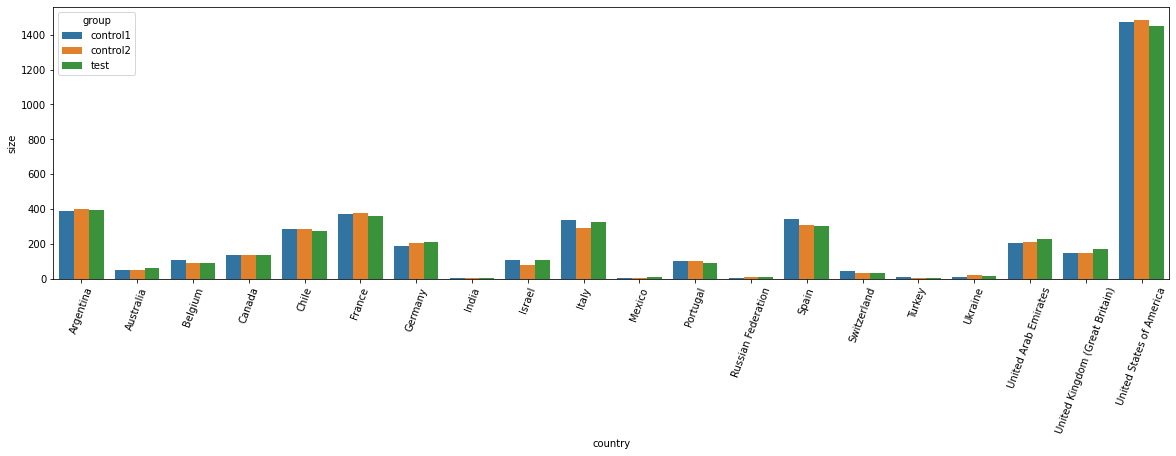

In [24]:
#на графике отобразим кол-во юзеров из топ-20 стран, определенный по тестовой группе
plt.figure(figsize = (20,5))
sns.barplot(data = users_in_top_20_countries, x="country", y="size", hue='group') 
plt.xticks(rotation=70)
plt.show()

как мы видим, распределение по странам примерно одинаковое во всех группах, но мы здесь рассматривали топ-20 стран, нельзя не отметить тот факт, что вообще в тестовой группе 51 страна и не во всех оставшихся странах есть представитель из контрольных групп. то есть для чистоты эксперимента, если мы знаем, что изменения были только для некоторых стран, было бы полезно этот фактор учитывать (каких именно стран) и сравнивать результат теста между пользователями конкретных стран.

В целом, т.к. пользователи из топ-20 стран составляют 99% общего кол-во юзеров, на данном этапе это ок.

далее сделаем один датафрейм, который будем использовать для дальнейшнего анализа, оставив записи только по тем странам, пользователи из которых есть и в контрольной (хотя бы в одной), и в тестовой группе

In [25]:
users_info_filtered_df = users_info_full_df.merge(countries_pivot.query('is_present =="yes"'), 
                                                  how='inner',on='country')

In [26]:
users_info_filtered_df.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,control1,control2,test,is_present
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0,test,1471.0,1486.0,1450.0,yes
1,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0,test,1471.0,1486.0,1450.0,yes
2,891219699,30,1000,NaN,United States of America,NaN,1,27,33,1,1.0,NaN,0,test,1471.0,1486.0,1450.0,yes


In [27]:
users_info_filtered_df.shape

(12869, 18)

In [28]:
#проверка на полноту

users_info_filtered_df.shape[0] - countries_pivot[countries_pivot.is_present == "yes"].fillna(0).apply \
                                  (lambda row: row["test"] + row["control1"] + row["control2"],axis=1).sum()

0.0

теперь посмотрим распределение по возрасту в нашем отфильтрованном df, т к вообще распределение по возрасту тоже важно, потому что обычно чем старше человек, тем больше затрат он может себе позволить (в нашем случае купить или не купить подписку)

In [29]:
users_info_filtered_df.groupby(['group', 'age'], as_index=False).size()

,group,age,size
0,control1,16,82
1,control1,17,22
2,control1,18,74
3,control1,19,93
4,control1,20,116
...,...,...,...
166,test,76,1
167,test,77,1
168,test,83,1
169,test,98,1


In [30]:
print('test group:\n',
      users_info_filtered_df.query('group == "test"').age.describe(),
      '\nmedian:',
      users_info_filtered_df.query('group == "test"').age.median(),
      '\n\ncontrol1 group:\n',
      users_info_filtered_df.query('group == "control1"').age.describe(),
      '\nmedian:',
      users_info_filtered_df.query('group == "control1"').age.median(),
      '\n\ncontrol2 group:\n',
      users_info_filtered_df.query('group == "control2"').age.describe(),
      '\nmedian:',
      users_info_filtered_df.query('group == "control2"').age.median(),
     )

test group:
 count    4290.000000
mean       31.897203
std        10.256692
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64 
median: 30.0 

control1 group:
 count    4330.000000
mean       32.087760
std        10.260081
min        16.000000
25%        24.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64 
median: 30.0 

control2 group:
 count    4249.000000
mean       32.034832
std        10.139201
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64 
median: 30.0


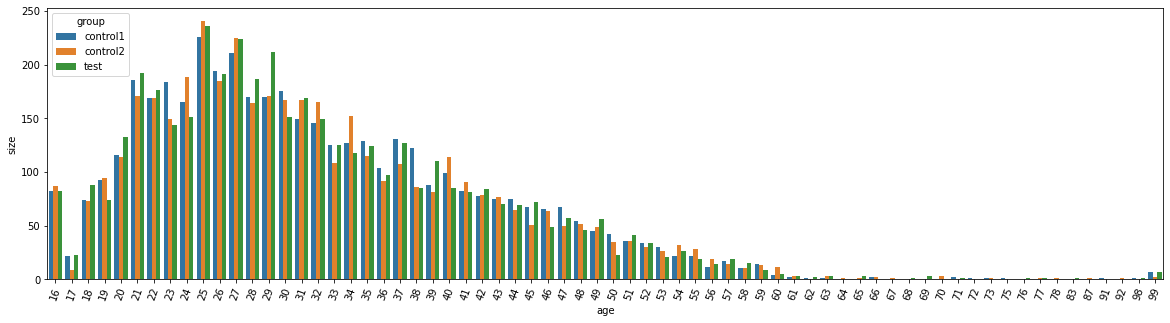

In [31]:
#также отобразим на графике распределение юзеров по возрасту в группах 
plt.figure(figsize = (20,5))
sns.barplot(data = users_info_filtered_df.groupby(['group', 'age'], as_index=False).size(), 
            x="age", y="size", hue='group') 
plt.xticks(rotation=70)
plt.show()

мы видим, что показатели по возрасту среди наших групп также схожи, хотя также можем заметить, что есть прямо очень взрослые люди 90+ лет, что может говорить либо о некорректности данных, вводимых пользователями, либо о том, что в БД значения сохранились некорректно, либо о том, что эти люди супер современные :) 

Вывод по данным о пользователях: не смотря на то, что не все встречающиеся страны включают в себя пользователей из контрольных и тестовых групп, можно сказать, что сплитование было проведено корректно, т к распредление пользователей по странам, возрастам адекватное и схожее между группами.

Перейдем к файлам по транзакциям

In [32]:
transactions_test.head(3)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type


In [33]:
transactions_control_1.head(3)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins


In [34]:
transactions_control_2.head(3)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium


In [35]:
print('df size in test group:\n',
      transactions_test.shape,
      '\n\n df size in control1 group:\n',
      transactions_control_1.shape,
      '\n\n df size in control2 group:\n',
      transactions_control_2.shape)

df size in test group:
 (273, 8) 

 df size in control1 group:
 (1007, 8) 

 df size in control2 group:
 (328, 8)


данных в файле о транзакциях первой контрольной группы сильно больше, будем иметь это в виду и посмотрим далее, что там

In [36]:
#добавим колонки для обозначения группы пользователя и создадим один общий датафрейм для более удобного анализа
transactions_test['group']='test'
transactions_control_1['group']='control1'
transactions_control_2['group']='control2'

transactions_full_df = pd.concat([transactions_test, transactions_control_1,transactions_control_2], 
                                 sort=False, axis=0)
transactions_full_df.head(3)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test


In [37]:
transactions_full_df.shape

(1608, 9)

In [38]:
#проверка данных на полноту
if transactions_test.shape[0]+transactions_control_1.shape[0]+transactions_control_2.shape[0] \
    -transactions_full_df.shape[0] == 0:
    print('ВСЁ ОК')
else:
    print('каких-то строчек не хватает')

ВСЁ ОК


In [39]:
transactions_full_df.dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
group            object
dtype: object

In [40]:
transactions_control_2.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
group           0
dtype: int64

In [41]:
#приведем колонки с датами в формат datetime
transactions_full_df.joined_at = pd.to_datetime(transactions_full_df.joined_at)
transactions_full_df.paid_at = pd.to_datetime(transactions_full_df.paid_at)

In [42]:
transactions_full_df.describe()

,uid,revenue,payment_id
count,9.780000e+02,978.000000,978.000000
mean,8.920309e+08,7032.361963,94.592025
std,3.843685e+06,8655.787235,57.930448
min,8.910681e+08,26.000000,0.000000
25%,8.914837e+08,2577.250000,19.000000
50%,8.918626e+08,5804.500000,146.000000
75%,8.921428e+08,9087.000000,147.000000
max,9.609370e+08,113477.000000,147.000000


In [43]:
#проверим таблицу на дублирующиеся строки 
if transactions_full_df.uid.nunique()-transactions_full_df.shape[0] == 0:
    print('все строки уникальны, дублирующихся нет')
else:
    print('обнаружены дубликаты строк')

обнаружены дубликаты строк


In [44]:
#проверим датафрейм на пропущенные значения
transactions_full_df.isna().sum()

uid             630
country         630
joined_at       630
paid_at         630
revenue         630
payment_id      630
from_page       630
product_type    630
group             0
dtype: int64

In [45]:
#посмотрим также на кол-во пропущенных значения в каждой группе отдельно
print('number of null values in test group:\n',
      transactions_full_df.query('group == "test"').isna().sum(),
      '\n\n number of null values in control1 group:\n',
      transactions_full_df.query('group == "control1"').isna().sum(),
     '\n\n number of null values in control2 group:\n',
      transactions_full_df.query('group == "control2"').isna().sum())

number of null values in test group:
 uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
group           0
dtype: int64 

 number of null values in control1 group:
 uid             630
country         630
joined_at       630
paid_at         630
revenue         630
payment_id      630
from_page       630
product_type    630
group             0
dtype: int64 

 number of null values in control2 group:
 uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
group           0
dtype: int64


мы видим, что пропущенные значения (они и возможно дубликаты строк) идут из первой контрольной группы, в которой было больше всего строк. посмотрим детальнее, что это за строки

In [46]:
transactions_full_df.query('group == "control1"').sort_values('uid')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
252,891092322.0,Argentina,2017-09-11 22:48:00,2017-11-11 18:21:00,741.0,146.0,empty_likes,coins,control1
36,891092322.0,Argentina,2017-09-11 22:48:00,2017-10-11 01:18:00,5278.0,147.0,autoreply_message,premium_no_trial,control1
95,891092322.0,Argentina,2017-09-11 22:48:00,2017-11-11 18:22:00,3926.0,19.0,empty_likes,coins,control1
64,891120969.0,France,2017-09-11 12:24:00,2017-09-11 12:40:00,6292.0,147.0,autoreply_message,premium_no_trial,control1
39,891130164.0,United States of America,2017-09-11 07:37:00,2017-10-11 12:27:00,2730.0,67.0,empty_likes,other_type,control1
...,...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1


In [47]:
transactions_full_df.query('group == "control1"').sort_values('uid').query('paid_at == "NaT"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
378,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
379,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
380,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
381,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
...,...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,control1


In [48]:
#похоже, что эти 630 дублирующихся строк с пропущенными значениями, поэтому удалим их из датафрейма по транзакциям 
transactions_full_df = transactions_full_df.dropna()
transactions_full_df.shape

(978, 9)

In [49]:
#проверка данных на полноту
if 1608-transactions_full_df.shape[0] == 630:
    print('ВСЁ ОК')
else:
    print('каких-то строчек не хватает')

ВСЁ ОК


In [50]:
#снова проверим датафрейм на пропущенные значения
transactions_full_df.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
group           0
dtype: int64

теперь нет лишних пустых строк

In [51]:
print('shape of test group:\n',
      transactions_full_df.query('group == "test"').shape,
      '\n\n shape of  control1 group:\n',
      transactions_full_df.query('group == "control1"').shape,
     '\n\n shape of  control2 group:\n',
      transactions_full_df.query('group == "control2"').shape)

shape of test group:
 (273, 9) 

 shape of  control1 group:
 (377, 9) 

 shape of  control2 group:
 (328, 9)


In [52]:
#посмотрим также на кол-во уникальных значений в каждой группе отдельно
print('number of unique rows in test group:\n',
      transactions_full_df.query('group == "test"').nunique(),
      '\n\n number of unique rows in control1 group:\n',
      transactions_full_df.query('group == "control1"').nunique(),
     '\n\n number of unique rows in control2 group:\n',
      transactions_full_df.query('group == "control2"').nunique())

number of unique rows in test group:
 uid             146
country          17
joined_at       146
paid_at         258
revenue         125
payment_id        6
from_page        22
product_type      4
group             1
dtype: int64 

 number of unique rows in control1 group:
 uid             193
country          18
joined_at       193
paid_at         335
revenue         127
payment_id        7
from_page        25
product_type      4
group             1
dtype: int64 

 number of unique rows in control2 group:
 uid             187
country          19
joined_at       187
paid_at         309
revenue         123
payment_id        6
from_page        18
product_type      4
group             1
dtype: int64


как мы видим, в каждой из групп для одного пользователя может быть несколько записей, посмотрим, что они из себя представляют

In [53]:
transactions_full_df.sort_values('uid')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
48,891068079.0,Argentina,2017-10-11 11:45:00,2017-11-11 04:20:00,4004.0,146.0,empty_likes,coins,control2
298,891068079.0,Argentina,2017-10-11 11:45:00,2017-12-11 15:23:00,6292.0,147.0,promo_09,premium_no_trial,control2
22,891071157.0,United States of America,2017-10-11 10:20:00,2017-10-11 16:37:00,9100.0,147.0,promo_09,premium_no_trial,test
189,891075072.0,United States of America,2017-10-11 08:23:00,2017-11-14 21:44:00,2327.0,67.0,empty_likes,other_type,control2
44,891077727.0,Argentina,2017-10-11 06:38:00,2017-10-11 16:33:00,6292.0,147.0,left_sidebar_menu,premium_no_trial,control2
...,...,...,...,...,...,...,...,...,...
159,892438635.0,France,2017-10-14 00:58:00,2017-10-23 12:55:00,16653.0,147.0,trial_vip_popup,trial_premium,test
42,892438776.0,United States of America,2017-10-14 00:54:00,2017-10-23 12:31:00,12727.0,147.0,trial_vip_popup,trial_premium,control2
101,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type,control1
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type,control1


несколько записей для одного юзера не является багом, т.к мы знаем по условию, что подписка оплачивается ежемесячно автоматически, пока пользователь её не отменил

теперь посмотрим на временные промежутки регистраций пользователей, т.к. тест должен проводиться в одно время

In [54]:
print('test group dates description:\n',
      transactions_full_df.query('group == "test"').describe(include='datetime'),
      '\n\n control1 group dates description:\n',
      transactions_full_df.query('group == "control1"').describe(include='datetime'),
     '\n\n control2 group dates description:\n',
      transactions_full_df.query('group == "control2"').describe(include='datetime'))

test group dates description:
                   joined_at              paid_at
count                   273                  273
unique                  146                  258
top     2017-10-18 01:09:00  2017-10-22 22:08:00
freq                     14                    4
first   2017-01-11 03:07:00  2017-01-11 04:37:00
last    2017-10-31 23:40:00  2017-12-11 22:06:00 

 control1 group dates description:
                   joined_at              paid_at
count                   377                  377
unique                  193                  335
top     2017-10-16 01:38:00  2017-10-16 02:08:00
freq                     27                    5
first   2015-01-19 11:49:00  2016-12-14 16:16:00
last    2017-10-31 22:17:00  2017-12-11 21:57:00 

 control2 group dates description:
                   joined_at              paid_at
count                   328                  328
unique                  187                  309
top     2017-10-30 15:22:00  2017-10-23 20:17:00
freq       

как мы видим по тестовой группе, эксперимент проводился с 11го января 2017 по 31ое октября 2017, но в 1ой контрольной группе есть записи о транзакциях до начала этого времени, эти записи нам придется не брать в учет для дальнейшего анализа и исключить их из таблицы, так как нас интересуют новые пользователи по условию.

In [55]:
#посмотрим на эти строки
transactions_full_df.query('joined_at < "2017-01-11"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type,control1
101,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type,control1
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type,control1


их оказалось всего лишь три, поэтому наша выборка уменьшится незначительно.

далее отфильтруем датасет транзакций, оставив там только тех юзеров, чьи страны представлены и в контрольной, и в тестовой группе, а также те записи, которые относятся к периоду проведения теста.

In [56]:
transactions_filtered_df = transactions_full_df.query('joined_at >= "2017-01-11"') \
                                    .merge(users_info_filtered_df.uid, how='inner',on='uid')
transactions_filtered_df.head(2)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test


In [57]:
transactions_filtered_df.shape

(966, 9)

In [58]:
transactions_full_df.shape

(978, 9)

In [59]:
#посмотрим также на кол-во уникальных значений в каждой группе отдельно, сколько теперь
print('number of unique rows in test group:\n',
      transactions_filtered_df.query('group == "test"').nunique(),
      '\n\n number of unique rows in control1 group:\n',
      transactions_filtered_df.query('group == "control1"').nunique(),
     '\n\n number of unique rows in control2 group:\n',
      transactions_filtered_df.query('group == "control2"').nunique())

number of unique rows in test group:
 uid             145
country          16
joined_at       145
paid_at         254
revenue         123
payment_id        6
from_page        22
product_type      4
group             1
dtype: int64 

 number of unique rows in control1 group:
 uid             192
country          17
joined_at       192
paid_at         332
revenue         124
payment_id        7
from_page        22
product_type      4
group             1
dtype: int64 

 number of unique rows in control2 group:
 uid             185
country          17
joined_at       185
paid_at         305
revenue         121
payment_id        6
from_page        18
product_type      4
group             1
dtype: int64


количество строк осталось примерно таким же (на 12 строк меньше).

# 2. Дополнительная проверка данных и анализ структуры выручки

В данном блоке нам нужно убедиться в том, что данные из файлов (по юзерам и транзакциям) соответствуют друг другу, и если нет - дополнительно обработать данные для дальнейшего анализа.
Как только убедимся, что с данными всё в порядке, нам нужно будет проанализировать, сколько премиум-подписок в контрольных группах, сколько в тестовой, сколько выручки они принесли, как вообще формируется выручка, по какому типу продукта, из каких страниц переходят для оплаты в основном.

# 2.1 Проверка данных на соответствие друг другу и доп преобразование

Для начала сравнив сумму выручки, которая указана для каждого юзера, из двух основных df

In [60]:
revenue_trans = transactions_filtered_df.groupby('uid',as_index=False).agg({'revenue':'sum'}).sort_values('uid')
revenue_trans.revenue.sum()

6841809.0

In [61]:
revenue_users_info = users_info_filtered_df[['uid','total_revenue']].query('total_revenue>0').sort_values('uid')
revenue_users_info.total_revenue.sum()

6767488

мы видим, что сумма выручки по данным транзакций больше, чем из инфо о юзерах. попробуем найти таких юзеров и понять, почему выручка отличается

In [62]:
revenue_df = revenue_trans.merge(revenue_users_info, on='uid', how='outer').fillna(0)
revenue_df['difference'] = revenue_df.total_revenue-revenue_df.revenue
revenue_df.query('difference>0 | difference<0 ')

,uid,revenue,total_revenue,difference
462,892275462.0,58968.0,14885.0,-44083.0
492,892355163.0,30264.0,0.0,-30264.0
522,960936960.0,0.0,26.0,26.0


выручка по трем юзерам отличается в данных о платежах и данных по пользователям, посмотрим на эти данные детальнее

In [63]:
#пользователь 892275462.0 - по нему нужно посмотреть, что записано и в файле о юзерах, и в файле о транзакциях
# в транзакциях мы видим бОльшую сумму, начнем с этого файла (будем смотреть полные файлы)

transactions_full_df.query('uid ==892275462')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
64,892275462.0,France,2017-10-17 05:56:00,2017-02-11 18:24:00,44083.0,19.0,coins_popup,other_type,test
154,892275462.0,France,2017-10-17 05:56:00,2017-10-20 17:00:00,14885.0,68.0,super_popup,other_type,test


In [64]:
transactions_filtered_df.query('uid ==892275462')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
132,892275462.0,France,2017-10-17 05:56:00,2017-02-11 18:24:00,44083.0,19.0,coins_popup,other_type,test
133,892275462.0,France,2017-10-17 05:56:00,2017-10-20 17:00:00,14885.0,68.0,super_popup,other_type,test


In [65]:
users_info_full_df.query('uid ==892275462')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
2070,892275462,31,310,NaN,France,"1,2,3,4,5,9,13,15,16",1,36,68,58,1.0,1.0,14885,test


In [66]:
users_info_filtered_df.query('uid ==892275462')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,control1,control2,test,is_present
5469,892275462,31,310,NaN,France,"1,2,3,4,5,9,13,15,16",1,36,68,58,1.0,1.0,14885,test,370.0,376.0,359.0,yes


у данного пользователя был один платеж до регистрации, тк мы не знаем наверняка, возможно ли это чисто технически, будем считать, что это баг (т.к. и в данных о юзерах мы видим как раз ту сумму, которая по второму платежу), и либо дата регистрации указана неверно, либо это платеж другого юзера, поэтому эту запись мы удалим из нашего дф по транзакциям

In [67]:
#пользователь 892355163.0
#в транзакциях есть оплата, а в файле о юзерах суммы выручки нет

transactions_full_df.query('uid ==892355163')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
303,892355163.0,United States of America,2017-10-15 18:45:00,2017-10-16 09:52:00,30264.0,68.0,super_popup,other_type,control1


In [68]:
transactions_filtered_df.query('uid ==892355163')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
609,892355163.0,United States of America,2017-10-15 18:45:00,2017-10-16 09:52:00,30264.0,68.0,super_popup,other_type,control1


In [69]:
users_info_full_df.query('uid ==892355163')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
3370,892355163,40,640,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,25,60,700,1.0,NaN,0,control1


In [70]:
users_info_filtered_df.query('uid ==892355163')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,control1,control2,test,is_present
2582,892355163,40,640,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,25,60,700,1.0,NaN,0,control1,1471.0,1486.0,1450.0,yes


у данного юзера оплата была после регистрации и на второй день, то есть скорее всего в данном случае баг в файле с данными о юзерах, тк если бы это был пробный период (сумма ноль), то первая оплата была бы через месяц (т.к. чаще всего пробный период месяц). если бы у нас был полный доступ ко всем данным (в тч логам), мы бы могли в точности сказать ,это был пробный период или нет, была ли действительно оплата, записались ли верно даты, но тк у нас нет такой возможности, мы вручную исправим сумму выручки для этого пользователя в дф о юзерах для того, чтобы наши таблицы сосотвествовали друг другу.

In [71]:
#пользователь 960936960.0 
#в транзакциях нет оплаты,но в файле о юзерах суммы есть

transactions_full_df.query('uid ==960936960')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type,control1
101,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type,control1
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type,control1


In [72]:
transactions_filtered_df.query('uid ==960936960')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group


In [73]:
users_info_full_df.query('uid ==960936960')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
510,960936960,30,4,99958.0,Russian Federation,"1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24...",1,26,62,4262,1.0,1.0,26,control1


In [74]:
users_info_filtered_df.query('uid ==960936960')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,control1,control2,test,is_present
12803,960936960,30,4,99958.0,Russian Federation,"1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24...",1,26,62,4262,1.0,1.0,26,control1,6.0,8.0,7.0,yes


это юзер, у которого дата регистрации до начала теста. для чистоты эскперимента, уберем этого юзера и из датафрейма по юзерам

итак нам нужно:
    для 892275462 юзера удалить запись об оплате до даты регистрации (payment_id=19)
    для 892355163 юзера исправить сумму выручки в файле с юзерами (заменить 0 на 30264)
    для 960936960 юзера удалить запись из дф по юзерам

In [75]:
#сделаем финальный датафрейм по транзакциям, удалив одну запись по её индексу
final_transaction_df = \
    transactions_filtered_df.drop(transactions_filtered_df.loc[transactions_filtered_df['uid'] == 892275462] \
 .loc[transactions_filtered_df['payment_id'] == 19.0].index)
final_transaction_df.shape

(965, 9)

In [76]:
transactions_filtered_df.shape

(966, 9)

In [77]:
final_transaction_df.query('uid ==892275462')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
133,892275462.0,France,2017-10-17 05:56:00,2017-10-20 17:00:00,14885.0,68.0,super_popup,other_type,test


да, действительно, теперь только одна запись по данному юзеру

In [78]:
#теперь сделаем финальный датафрейм по юзерам, исправив сумму выручки по одному юзеру, и удалив одного другого

final_users_df = \
users_info_filtered_df.drop(users_info_filtered_df.loc[users_info_filtered_df['uid'] == 960936960].index)
final_users_df.shape

(12868, 18)

In [79]:
users_info_filtered_df.shape

(12869, 18)

In [80]:
final_users_df.loc[final_users_df['uid'] ==892355163]

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,control1,control2,test,is_present
2582,892355163,40,640,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,25,60,700,1.0,NaN,0,control1,1471.0,1486.0,1450.0,yes


In [81]:
final_users_df.loc[2582,'total_revenue']=30264

In [82]:
final_users_df.loc[final_users_df['uid'] ==892355163]

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,control1,control2,test,is_present
2582,892355163,40,640,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,25,60,700,1.0,NaN,30264,control1,1471.0,1486.0,1450.0,yes


сумму изменили, лишние строки удалили, теперь убедимся, что выручка у нас одинаковая в файле о транзакциях, и в файле о юзерах

In [83]:
final_users_df.total_revenue.sum()-final_transaction_df.revenue.sum()

0.0

теперь расхождений нет и далее мы можем перейти к анализу структуры выручки

# 2.2 Анализ структуры выручки

для начала посмотрим на распредление пользователей по наличию премиум-подписки, сумме выручки внутри групп 

was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)

In [84]:
#проверим какие значения есть в колонке was_premium
final_users_df.was_premium.unique()

array([nan,  1.])

In [85]:
#и заменим пустоту на 0,

final_users_df['was_premium'] = final_users_df['was_premium'].fillna(0)

In [86]:
final_users_df.groupby(['group', 'was_premium'], as_index=False).agg({'total_revenue':'sum','uid':'count'})

,group,was_premium,total_revenue,uid
0,control1,0.0,127634,3894
1,control1,1.0,2483871,435
2,control2,0.0,39936,3840
3,control2,1.0,1855568,409
4,test,0.0,12363,3883
5,test,1.0,2278354,407


мы видим, что распределение выручки по наличию и отстуствию премиум-подписки одинаковое в группах, но и также видим, что выручка есть и по пользователям, у которых никогда не было премиум-подписки, но бОльшая доля приходится как раз на премиум-подписки.

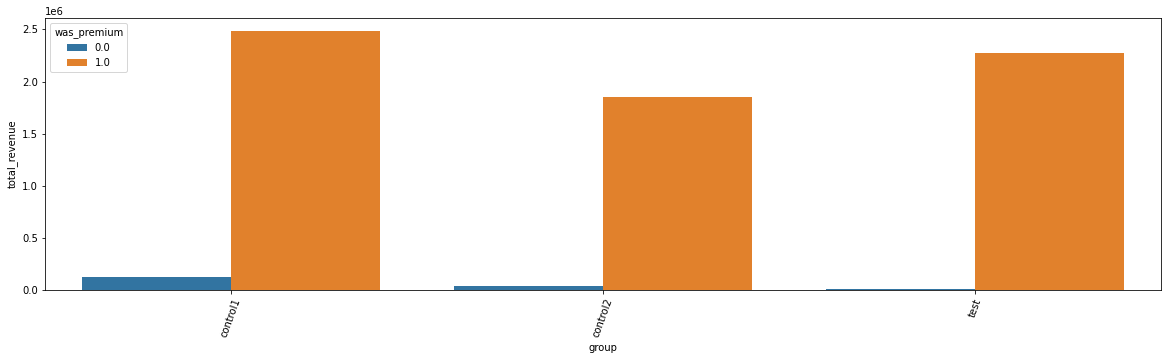

In [87]:
#посмотрим на графике этот момент
plt.figure(figsize = (20,5))
sns.barplot(data = \
    final_users_df.groupby(['group', 'was_premium'], as_index=False).agg({'total_revenue':'sum','uid':'count'}), 
    x="group", y="total_revenue", hue='was_premium') 
plt.xticks(rotation=70)
plt.show()

мы видим, что соотношение выручки между теми, у кого есть премиум подписка, и теми, у кого её нет, выше в тестовой группе

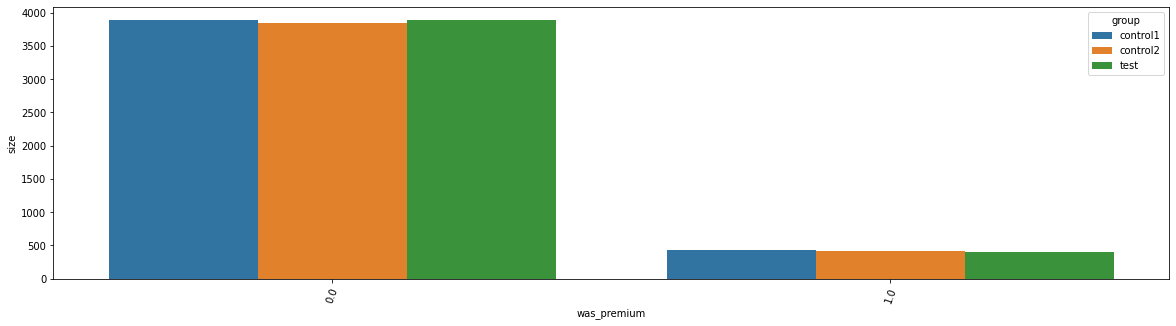

In [88]:
#также посмотрим сколько пользователей с подписками и без в группах
plt.figure(figsize = (20,5))
sns.barplot(data = final_users_df.groupby(['group', 'was_premium'], as_index=False).size(), 
            x="was_premium", y="size", hue='group') 
plt.xticks(rotation=70)
plt.show()

соотношение примерно одинаковое во всех группах

теперь посмотрим распределение выручки по 
product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое)

In [89]:
final_transaction_df.product_type.unique()

array(['trial_premium', 'other_type', 'coins', 'premium_no_trial'],
      dtype=object)

In [90]:
final_transaction_df.groupby(['group', 'product_type'], as_index=False) \
.agg({'revenue':'sum','uid':pd.Series.nunique})

,group,product_type,revenue,uid
0,control1,coins,871910.0,65.0
1,control1,other_type,187616.0,29.0
2,control1,premium_no_trial,779259.0,99.0
3,control1,trial_premium,772720.0,67.0
4,control2,coins,394797.0,68.0
5,control2,other_type,128739.0,33.0
6,control2,premium_no_trial,740753.0,101.0
7,control2,trial_premium,631215.0,52.0
8,test,coins,562432.0,51.0
9,test,other_type,123734.0,19.0


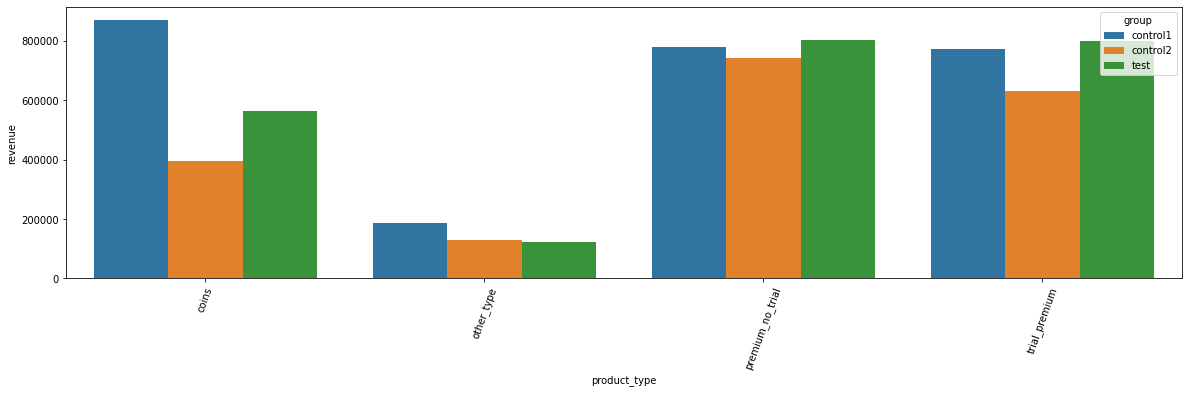

In [91]:
#посмотрим на графике
plt.figure(figsize = (20,5))
sns.barplot(data = \
    final_transaction_df.groupby(['group', 'product_type'], as_index=False).agg({'revenue':'sum','uid':pd.Series.nunique}), 
    x="product_type", y="revenue", hue='group') 
plt.xticks(rotation=70)
plt.show()

здесь мы видим, что в тестовой группе бОльшая часть выручки формируется как раз по премиум подпискам (подписка без пробного периода чуть больше принесла, чем просто пробный), а в контрольных группах по-разному , во второй группе два основных типа такие же, как в тестовой, а в первой контрольной выше всего тип coins

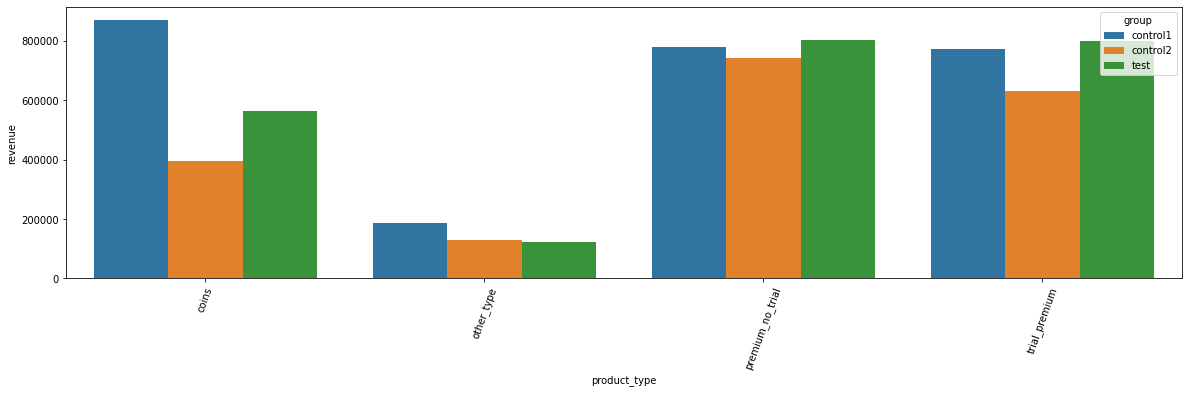

In [92]:
#посмотрим на ещё один график
plt.figure(figsize = (20,5))
sns.barplot(data = \
    final_transaction_df.groupby(['group', 'product_type'], as_index=False) \
            .agg({'revenue':'sum','uid':pd.Series.nunique}), x="product_type", y="revenue", hue='group') 
plt.xticks(rotation=70)
plt.show()

туту мы видим, что выше всего выручка в тестовой группе по типу premium_no_trial (который нас интересует больше всего)

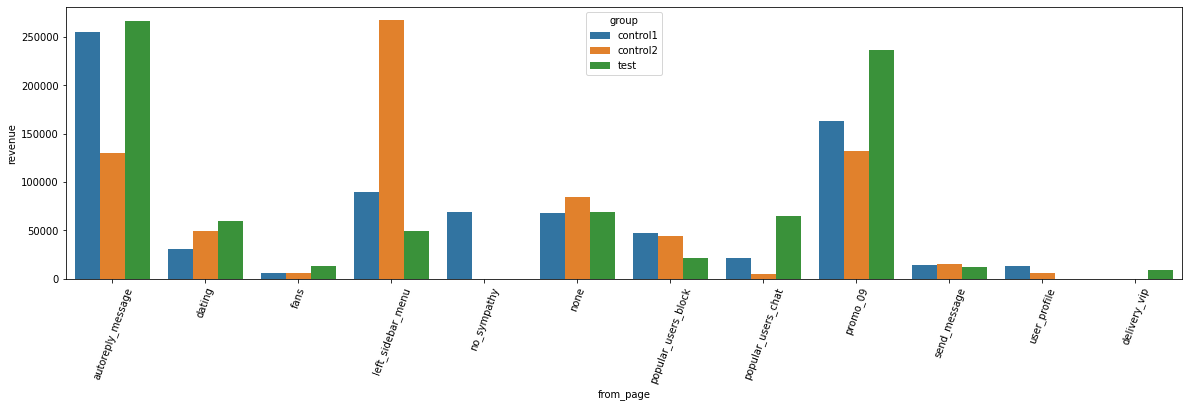

In [93]:
#посмотрим из каких источников происходит оплата чаще всего
plt.figure(figsize = (20,5))
sns.barplot(data = \
    final_transaction_df.query('product_type=="premium_no_trial"').groupby(['group', 'from_page'], as_index=False) \
            .agg({'revenue':'sum','uid':pd.Series.nunique}), x="from_page", y="revenue", hue='group') 
plt.xticks(rotation=70)
plt.show()

чаще всего пользователи переходили из страниц autoreply_message, promo_09 для оплаты премиум-подписки

# 3. Расчет метрик и их взаимосвязь с группами

В данном блоке нам нужно будет рассчитать метрики и сравнить их, чтобы можно было сделать вывод об успешности проведения теста. 

Так как мы не знаем настояющих целей данного теста, я предположу, что ожидалось увеличение выручки с платящих пользователей и бОльшее кол-во премиум подписок (бОльшее кол-во платящих пользователей).

Поэтому метрики будут следующие:
- ARPPU
- Conversion into purchase of premium subcrip

далее мы будем считать метрики и сравнивать их между собой

для начала сравним ARPPU в контрольных группах между собой и убедимся, что различий в них нет, чтобы можно было объединить две контрольные группы в одну для дальнейшего сравнивания с тестовой группой

In [94]:
final_transaction_df.query('product_type=="premium_no_trial"') \
.groupby('group', as_index=False).agg({'revenue':'sum','uid':pd.Series.nunique})

,group,revenue,uid
0,control1,779259.0,99.0
1,control2,740753.0,101.0
2,test,804349.0,66.0


In [95]:
control1_df = final_transaction_df.query('group=="control1" & product_type=="premium_no_trial"') \
            .groupby(['group','uid' ], as_index=False).agg({'revenue':'sum'})
control2_df = final_transaction_df.query('group=="control2" & product_type=="premium_no_trial"') \
            .groupby(['group','uid' ], as_index=False).agg({'revenue':'sum'})

In [96]:
control1_df.revenue.mean()

7871.30303030303

In [97]:
control2_df.revenue.mean()

7334.188118811881

теперь посмотрим, стат значимо ли различие между ARPPU в контрольных группах. 
Н0 - стат значимых различий между контрольными группами нет, ARPPU одинаковое
Н1 - ARPPU отличается в контрольных группах стат значимо

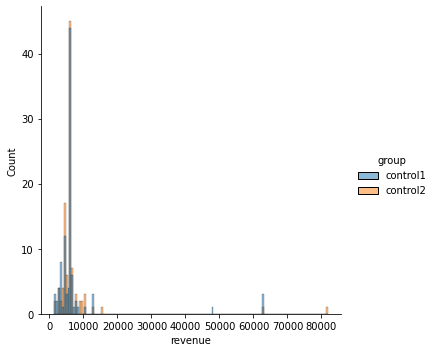

In [98]:
#посмотрим на распределения двух выборок
sns.displot(data = final_transaction_df.query('group != "test" & product_type=="premium_no_trial"') \
            .groupby(['group','uid' ], as_index=False).agg({'revenue':'sum'}), x='revenue', hue='group'
           )

распределения довольно необычны и не похожи на нормальные, в тестовой группе дисперсия и изменчивость выше.

Так как у нас нет возможности провести эксперимент 1000 раз, чтобы сравнить разные ARRPU и оценить стат значимость, мы воспользуемся методом bootstrap, который фактически это и сделает, только на наших данных.

Метод bootstrap, в отличие от классических тестов статистики, которые могут иметь определенные ограничения при их использовании, более свободен от такого рода ограничений и может использоваться более эффективно.

In [99]:
#посчитаем разницы между средними (ARRPU) в группах и далее построим доверительный интервал для них
mean_diff = []

for i in range(1000):
    sample_data_control1 = control1_df.sample(frac=1, replace=True)
    sample_mean_control1 = sample_data_control1.revenue.mean()
    
    
    sample_data_control2 = control2_df.sample(frac=1, replace=True)
    sample_mean_control2 = sample_data_control2.revenue.mean()
    
    sample_mean_diff = sample_mean_control2 -  sample_mean_control1
    mean_diff.append(sample_mean_diff)

In [100]:
pd.Series(mean_diff).quantile(0.975)

2174.108220822082

In [101]:
pd.Series(mean_diff).quantile(0.025)

-3260.974884988498

С очень высокой вероятностью разница средних между контрольными группами находится в диапазоне от -3 261 до 2 174. Этот диапазон включает в себя 0, таким образом мы не можем отклонить нулевую гипотезу, ARRPU одинаковое в контрольных группах.

теперь мы можем объединить контрольные группы, чтобы далее сравнить метрику по всей контрольной группе с тестовой группой.
для этого создадим новую колонку "group_upd" в обоих датафреймах

In [102]:
final_transaction_df['group_upd'] = \
final_transaction_df.group.apply(lambda x: 'test' if x=='test' else 'control')

final_transaction_df.head(3)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,group_upd
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test,test
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test,test


In [103]:
final_users_df['group_upd'] = \
final_users_df.group.apply(lambda x: 'test' if x=='test' else 'control')

final_users_df.head(1)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,control1,control2,test,is_present,group_upd
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,NaN,0,test,1471.0,1486.0,1450.0,yes,test


посчитаем ARPPU (средний доход от платящих пользователей)

In [104]:
final_transaction_df.query('product_type=="premium_no_trial"') \
.groupby('group_upd', as_index=False).agg({'revenue':'sum','uid':pd.Series.nunique})

,group_upd,revenue,uid
0,control,1520012.0,200.0
1,test,804349.0,66.0


In [105]:
# посчитаем ARRPU пользователей с типом "premium_no_trial"
ARPPU_test_premium = \
final_transaction_df.query('group_upd=="test" & product_type=="premium_no_trial"').revenue.sum() \
/ final_transaction_df.query('group_upd=="test" & product_type=="premium_no_trial"').uid.nunique()     

f'ARPPU of test group with "premium_no_trial" product type is {ARPPU_test_premium}'

'ARPPU of test group with "premium_no_trial" product type is 12187.10606060606'

In [106]:
ARPPU_control_premium = \
final_transaction_df.query('group_upd=="control" & product_type=="premium_no_trial"').revenue.sum() \
/ final_transaction_df.query('group_upd=="control" & product_type=="premium_no_trial"').uid.nunique()     

f'ARPPU of control group with "premium_no_trial" product type is {ARPPU_control_premium}'

'ARPPU of control group with "premium_no_trial" product type is 7600.06'

ARPPU в тестовой группе выше, чем в контрольной.

теперь посмотрим, стат значимо ли различие между ARPPU в группах (для этого снова будем использовать bootstrap). 
Н0 - стат значимых различий между контрольной и тестовой группами нет, ARPPU не изменилось
Н1 - ARPPU отличается в группах стат значимо после внедрений изменений стоимости подписки

In [107]:
control_df = final_transaction_df.query('group_upd=="control" & product_type=="premium_no_trial"') \
            .groupby(['group_upd','uid' ], as_index=False).agg({'revenue':'sum'})

test_df = final_transaction_df.query('group_upd=="test" & product_type=="premium_no_trial"') \
            .groupby(['group_upd','uid' ], as_index=False).agg({'revenue':'sum'})

In [108]:
#посчитаем разницы между средними (ARRPU) в группах и далее построим доверительный интервал для них
mean_diff = []

for i in range(1000):
    sample_data_control = control_df.sample(frac=1, replace=True)
    sample_mean_control = sample_data_control.revenue.mean()
    
    
    sample_data_test = test_df.sample(frac=1, replace=True)
    sample_mean_test = sample_data_test.revenue.mean()
    
    sample_mean_diff = sample_mean_test -  sample_mean_control
    mean_diff.append(sample_mean_diff)

теперь построим доверительный интервал для разницы между средними (ARRPU) в группах, которые мы получали при многократном повторении эксперимента

In [109]:
pd.Series(mean_diff).quantile(0.975)

9549.76577651515

In [110]:
pd.Series(mean_diff).quantile(0.025)

382.39322727272827

С очень высокой вероятностью разница средних находится в диапазоне от 382 до 9 550. Этот диапазон не включает в себя 0, таким образом разница между ARRPU в группах стат значима. Поэтому мы можем говорить, что ARRPU стат значимо отличаются в группах.

далее посчитаем Conversion into purchase of premium subscription, сравним их значения и проверим стат значимость.

начнем снова со сравнения метрики между контрольными группами, чтобы убедиться, что они не отличаются и что мы можем их объединять в дальнейшем.
Н0 - стат значимых различий между контрольными группами нет, конверсия не изменилась
Н1 - стат значимые различия в конверсии между контрольными группами наблюдаются

In [111]:
CR_controls_df = final_transaction_df.query('group != "test" & product_type=="premium_no_trial"').groupby('group') \
    .agg({'uid':pd.Series.nunique}).rename(columns={'uid':'paid_users_count'}).merge \
(final_users_df.groupby('group') \
    .agg({'uid':pd.Series.nunique}).rename(columns={'uid':'all_users_count'}), how='inner',on='group')
CR_controls_df

,paid_users_count,all_users_count
group,,
control1,99.0,4329
control2,101.0,4249


In [112]:
CR_controls_df['not_paid_users_count']= CR_controls_df.all_users_count -CR_controls_df.paid_users_count
CR_controls_df

,paid_users_count,all_users_count,not_paid_users_count
group,,,
control1,99.0,4329,4230.0
control2,101.0,4249,4148.0


In [113]:
CR_controls_df.paid_users_count/CR_controls_df.all_users_count

group
control1    0.022869
control2    0.023770
dtype: float64

конверсия в покупку в контрольных группах очень схожа, проверим стат значимость минимальных различий

In [114]:
CR_controls_df[['paid_users_count','not_paid_users_count']].T

group,control1,control2
paid_users_count,99.0,101.0
not_paid_users_count,4230.0,4148.0


In [115]:
#проверим стат значимость различий между конверсиями
st.chi2_contingency(CR_controls_df[['paid_users_count','not_paid_users_count']].T)

(0.0420314586344013,
 0.8375598179767481,
 1,
 array([[ 100.93261833,   99.06738167],
        [4228.06738167, 4149.93261833]]))

мы получили р-value 0.84 выше порога значимости в 0.05, поэтому мы не можем отклонить нулевую гипотезу. конверсия в контрольных группах одинаковая и мы можем объединять эти группы для дальнейшего сравнения с тестовой группой.

теперь сравним метрику Conversion into purchase of premium subscription в контрольной и тестовой группах,  и проверим стат значимость.

Н0 - стат значимых различий между контрольной и тестовой группой нет, конверсия не изменилась
Н1 - стат значимые различия в конверсии между группами наблюдаются

In [116]:
final_transaction_df.query('product_type=="premium_no_trial"').groupby('group_upd', as_index=False) \
    .agg({'uid':pd.Series.nunique}).rename(columns={'uid':'paid_users_count'})

,group_upd,paid_users_count
0,control,200.0
1,test,66.0


In [117]:
final_users_df.groupby('group_upd', as_index=False) \
    .agg({'uid':pd.Series.nunique}).rename(columns={'uid':'all_users_count'})

,group_upd,all_users_count
0,control,8578
1,test,4290


In [118]:
CR_df = final_transaction_df.query('product_type=="premium_no_trial"').groupby('group_upd') \
    .agg({'uid':pd.Series.nunique}).rename(columns={'uid':'paid_users_count'}).merge \
(final_users_df.groupby('group_upd') \
    .agg({'uid':pd.Series.nunique}).rename(columns={'uid':'all_users_count'}), how='inner',on='group_upd')

CR_df

,paid_users_count,all_users_count
group_upd,,
control,200.0,8578
test,66.0,4290


In [119]:
CR_df['not_paid_users_count']= CR_df.all_users_count -CR_df.paid_users_count
CR_df

,paid_users_count,all_users_count,not_paid_users_count
group_upd,,,
control,200.0,8578,8378.0
test,66.0,4290,4224.0


In [120]:
CR_df.paid_users_count/CR_df.all_users_count

group_upd
control    0.023315
test       0.015385
dtype: float64

конверсия в покупку премиум-подписки в тестовой группе ниже, чем в контрольной

In [121]:
CR_df[['paid_users_count','not_paid_users_count']].T 

group_upd,control,test
paid_users_count,200.0,66.0
not_paid_users_count,8378.0,4224.0


In [122]:
#проверим стат значимость различий между конверсиями
st.chi2_contingency(CR_df[['paid_users_count','not_paid_users_count']].T)

(8.497855137600583,
 0.003555653792574964,
 1,
 array([[ 177.31955238,   88.68044762],
        [8400.68044762, 4201.31955238]]))

мы получили р-value 0.0036 меньше порога значимости в 0.05, поэтому можем отклонить нулевую гипотезу и утверждать, что конверсия стала ниже в тестовой группе и это различие стат значимо.

# Выводы

В результате можно сказать, что сплитование в целом было проведено корректно, распределение пользователей по странам, возрасту схожее между группами. При этом есть моменты, которые можно было бы учесть при следующих тестах, такие как диапазон дат (в одной группе были записи за 2015 год), возрасту (есть пользователи с возрастом 90+ лет, что кажется странным на первый взгляд).

Т.к. мы не знаем настоящую цель данного теста, предположим, что целью теста было увеличить выручку, в таком случае можно сказать, что тест был успешен, т.к. ARPPU выросло для тестовой группы. Но при этом, конверсия в покупку премиум подписки упала. Возможно также было бы полезно иметь в виду то, что из страниц autoreply_message, promo_09 чаще всего переходили для оплаты премиум-подписки.

Для хорошего теста и его анализа очень важно понимать что и для чего мы делаем. Для данного теста были бы очень полезны следующие моменты:
    важно понимать, для каких именно стран планировалось изменение;
    какие платежные системы были и какие появились новые, сколько их всего;
    может ли быть оплата до регистрации;
    какая цель теста;
    знать точные гипотезы данного теста, например, увеличить такую-то метрику на столько-то и тд.
    

Поэтому прежде чем выкатывать обновление на всех пользователей (если наше предположение о цели проведения теста верное), лучше узнать все детали и проверить их взаимосвязь.

# Дополнительное ревью пользователей из стран, в которых был представитель только одной группы (тестовой или контрольной)

рассмотрим страны, которые мы исключали из анализа (упоминалось в комментарии после 18 строки кода)

In [123]:
countries_pivot.query('is_present=="no"').head()

group,country,control1,control2,test,is_present
20,Indonesia,NaN,NaN,4.0,no
23,Latvia,NaN,NaN,2.0,no
29,Singapore,NaN,NaN,1.0,no
33,"Korea, Republic of",NaN,NaN,1.0,no
34,Nepal,NaN,NaN,1.0,no


In [124]:
users_info_full_df.merge(countries_pivot.query('is_present=="no"')['country'], how='inner',on='country').shape

(43, 14)

всего оказалось 43 юзера, которые есть либо в тестовой, либо в одной из контрольных групп

In [125]:
users_info_full_df.merge(countries_pivot.query('is_present=="no"')['country'], how='inner',on='country') \
.groupby (['country', 'group' ], as_index=False).size().head(20)

,country,group,size
0,Armenia,control1,1
1,Austria,control2,2
2,Azerbaijan,test,1
3,Belarus,control2,1
4,Bolivia,test,1
5,Brazil,test,1
6,Burkina Faso,control1,1
7,China,control1,1
8,China,control2,1
9,Czech Republic,control2,1


In [126]:
#посмотрим сколько выручки они принесли
users_info_full_df.merge(countries_pivot.query('is_present=="no"')['country'], how='inner',on='country') \
.total_revenue.sum()

35035

In [127]:
#посмотрим сколько юзеров сформировало эту выручку
users_info_full_df.merge(countries_pivot.query('is_present=="no"')['country'], how='inner',on='country') \
                            .query('total_revenue>0')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
9,891508155,34,101,1.0,Latvia,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,20,32,226,1.0,1.0,10101,test
31,891672225,38,163,11.0,Austria,"1,2,8,9,10,11,12,13,15,16",1,35,41,49,1.0,1.0,12168,control2
42,891791565,42,103,NaN,Lithuania,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18",1,19,39,58,1.0,1.0,12766,control2


In [128]:
#посмотрим транзакции по этим юзерам
transactions_full_df.query('uid == 891508155 | uid == 891672225 | uid == 891791565')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
15,891508155.0,Latvia,2017-02-11 09:46:00,2017-03-11 22:06:00,936.0,19.0,empty_likes,coins,test
90,891508155.0,Latvia,2017-02-11 09:46:00,2017-05-11 23:59:00,936.0,19.0,menu,coins,test
147,891508155.0,Latvia,2017-02-11 09:46:00,2017-02-11 17:34:00,936.0,146.0,gifts,coins,test
158,891508155.0,Latvia,2017-02-11 09:46:00,2017-03-11 22:06:00,936.0,19.0,empty_likes,coins,test
230,891508155.0,Latvia,2017-02-11 09:46:00,2017-11-11 20:38:00,6357.0,147.0,promo_09,premium_no_trial,test
116,891791565.0,Lithuania,2017-10-27 16:03:00,2017-03-11 21:54:00,12766.0,147.0,trial_vip_popup,trial_premium,control2
227,891672225.0,Austria,2017-10-29 21:59:00,2017-08-11 13:54:00,4056.0,19.0,none,coins,control2
232,891672225.0,Austria,2017-10-29 21:59:00,2017-06-11 23:58:00,4056.0,68.0,none,premium_no_trial,control2
290,891672225.0,Austria,2017-10-29 21:59:00,2017-07-11 11:26:00,4056.0,19.0,none,coins,control2


Какие можно сделать выводы и инсайты: 
Так как выручка по данным пользователям составила всего около 0,5%  от общей выручки и пользователей всего 43 (и только 3 из них сформировали выручку), можно сказать, что это обычная статистическая погрешность и особо полезной информации из анализа этих пользователей мы не вынесем. 